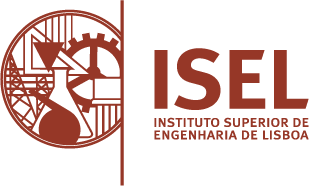<img style="float: center;" src="logo-isel.PNG">

<h1><center>PDS Trabalho Prático 1</center></h1>
<h2><center>Ano letivo 2020/2021</center></h2>


<h3>Docentes:</h3>
<h4>André Lourenço</h4>
<h4>Isabel Rodrigues</h4>

<h3>Trabalho realizado por:</h3>
<h4>António Ferreira nº 47500</h4>
<h4>Duarte Franco nº 42362</h4>

### Import's:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

<center><h2>I. Geração de Sinais</h2></center>

<h3>1. Use a função plot para representar os seguintes sinais contínuos (use a base de tempo que achar adequada):</h3>

a)  $a(t) = 2 \times cos( 2 \pi 20t ) + 5 \times sin( 2\pi21t )$

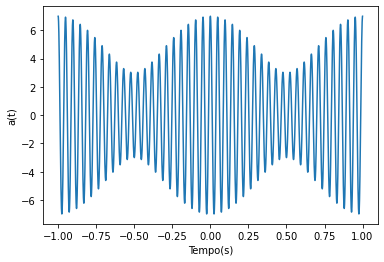

In [2]:
inc = 1 / 8000
t   = np.arange(-1, 1, inc)
at  = 2 * np.cos(2 * np.pi * 20 * t) + 5 * np.cos(2 * np.pi * 21 * t)

plt.xlabel("Tempo(s)")
plt.ylabel("a(t)")
plt.plot(t, at)

b) $ b(t) = (1 + \frac{1}{2} \times cos(2 \pi 6t)) \times cos(2 \pi 100t)$

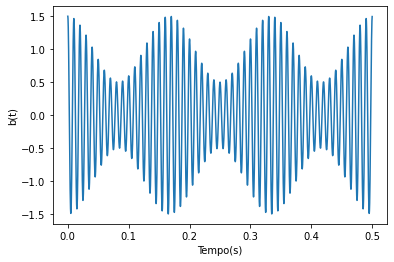

In [3]:
t = np.arange(0, 0.5, inc)
bt = ( 1 + 0.5 * np.cos(2 * np.pi * 6 * t)) * np.cos(2 * np.pi * 100 * t)

plt.xlabel("Tempo(s)")
plt.ylabel("b(t)")
plt.plot(t,bt)

c)  $ e^{-10t^2} \times cos(2 \pi 50t) \times (u(t + 3) - u(t - 3)) $

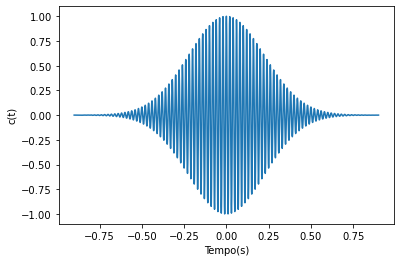

In [4]:
def u(t,x):
    return np.heaviside(t+x, 1)

t = np.arange(-0.9, 0.9, inc)
ct = np.exp(-10 * t ** 2) * (np.cos(2 * np.pi * 50 * t)) * ( u(t, 3) - u(t, -3))

plt.xlabel("Tempo(s)")
plt.ylabel("c(t)")
plt.plot(t, ct)

d)  $ \frac{4}{\pi} \sum_{k=1}^{N} \frac{sin(2\pi(2k-1)f_0t)}{2k - 1} $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $ 

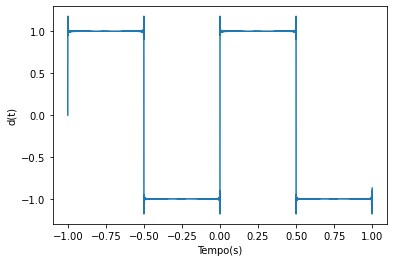

In [5]:
N  = [1, 10, 1000]
f0 = 1
t  = np.arange(-1, 1, inc)
dt = []
#for time in t:
d = 0
for k in range(1,1000):
    d += (np.sin(2 * np.pi * (2 * k - 1) * f0 * t) / ((2 * k - 1)))
#dt.append(d * (4 / np.pi))
d = d * (4 / np.pi)    
plt.xlabel("Tempo(s)")
plt.ylabel("d(t)")
plt.plot(t,d)

e)  $ \frac{8}{\pi^2} \sum_{k=1}^{N} (-1)^k (\frac{sin(2\pi(2k-1)f_0t)}{(2k - 1)^2}) $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $

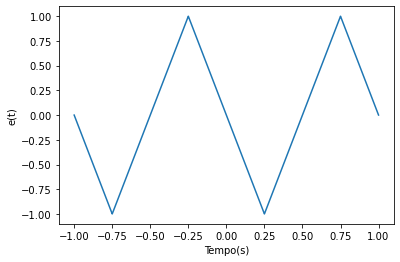

In [6]:
N  = [1, 10, 1000]
f0 = 1
t  = np.arange(-1, 1, inc)
et = []
#for time in t:
e = 0
for k in range(1,1000):
    e += ((-1) **  k) * (np.sin(2 * np.pi * (2 * k - 1) * f0 * t) / ((2 * k - 1) ** 2))
#et.append(e * (8 / (np.pi ** 2)))
e = e * (8 / (np.pi ** 2))  
plt.xlabel("Tempo(s)")
plt.ylabel("e(t)")
plt.plot(t,e)

<h3>2. Analise os sinais no domínio da frequência, representando os espectro de amplitude e fase e usando a fft.</h3>

 a)  $a(t) = 2 \times cos( 2 \pi 20t ) + 5 \times sin( 2\pi21t )$

(-45.0, 45.0, -4.0, 4.0)

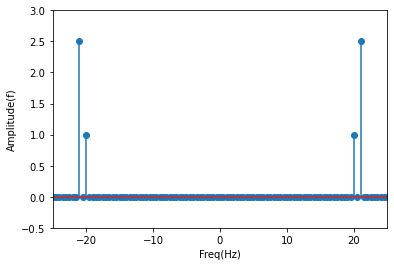

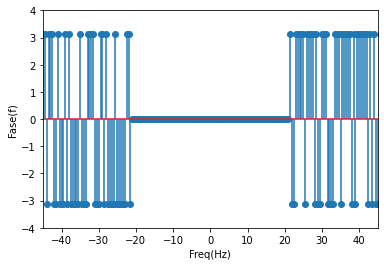

In [7]:
Fs        = 8000
Ts        = 1/Fs
Af        = np.fft.fft(at) / len(at)
fk        = np.fft.fftfreq(len(Af), Ts)
fase      = np.angle(Af)
amplitude = np.abs(Af)

plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amplitude, use_line_collection = True)
plt.axis([-25, 25, -0.5, 3])
plt.figure()

plt.xlabel("Freq(Hz)")
plt.ylabel("Fase(f)")
plt.stem(fk,fase, use_line_collection = True)
plt.axis([-45, 45, -4, 4])

b) $ b(t) = (1 + \frac{1}{2} \times cos(2 \pi 6t)) \times cos(2 \pi 100t)$

(-120.0, 120.0, -4.0, 4.0)

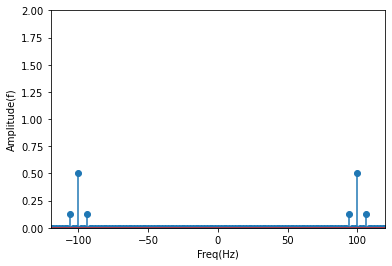

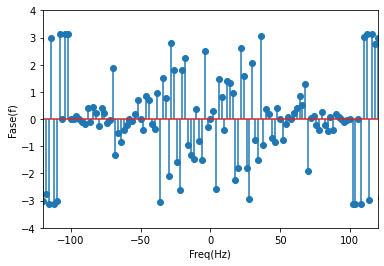

In [8]:
Bf        = np.fft.fft(bt) / len(bt)
fk        = np.fft.fftfreq(len(Bf), Ts)
fase      = np.angle(Bf)
amplitude = np.abs(Bf)

plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amplitude, use_line_collection = True)
plt.axis([-120, 120, 0, 2])
plt.figure()

plt.xlabel("Freq(Hz)")
plt.ylabel("Fase(f)")
plt.stem(fk,fase, use_line_collection = True)
plt.axis([-120, 120, -4, 4])

c)  $ e^{-10t^2} \times cos(2 \pi 50t) \times (u(t + 3) - u(t - 3)) $

(-75.0, 75.0, -4.0, 4.0)

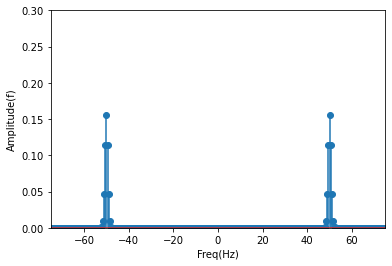

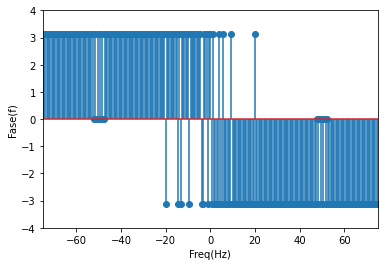

In [9]:
Cf        = np.fft.fft(ct) / len(ct)
fk        = np.fft.fftfreq(len(Cf), Ts)
fase      = np.angle(Cf)
amplitude = np.abs(Cf)

plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amplitude, use_line_collection = True)
plt.axis([-75, 75, 0, 0.3])
plt.figure()

plt.xlabel("Freq(Hz)")
plt.ylabel("Fase(f)")
plt.stem(fk,fase, use_line_collection = True)
plt.axis([-75, 75, -4, 4])

d)  $ \frac{4}{\pi} \sum_{k=1}^{N} \frac{sin(2\pi(2k-1)f_0t)}{2k - 1} $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $ 

(-75.0, 75.0, -4.0, 4.0)

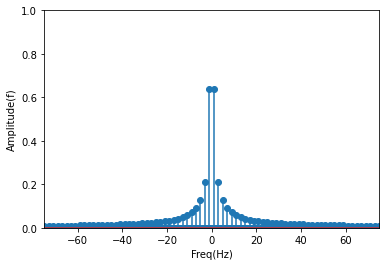

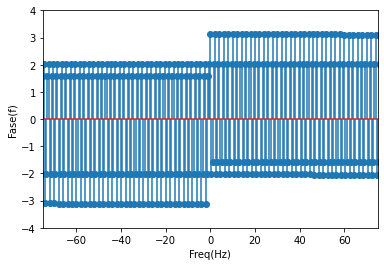

In [10]:
Df        = np.fft.fft(d) / len(d)
fk        = np.fft.fftfreq(len(Df), Ts)
fase      = np.angle(Df)
amplitude = np.abs(Df)

plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amplitude, use_line_collection = True)
plt.axis([-75, 75, 0, 1])
plt.figure()

plt.xlabel("Freq(Hz)")
plt.ylabel("Fase(f)")
plt.stem(fk,fase, use_line_collection = True)
plt.axis([-75, 75, -4, 4])

e)  $ \frac{8}{\pi^2} \sum_{k=1}^{N} (-1)^k (\frac{sin(2\pi(2k-1)f_0t)}{(2k - 1)^2}) $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $

(-75.0, 75.0, -4.0, 4.0)

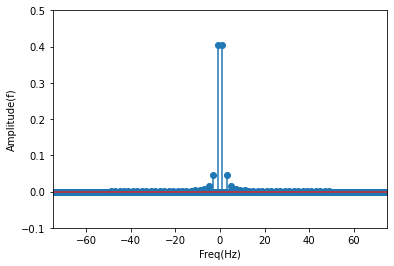

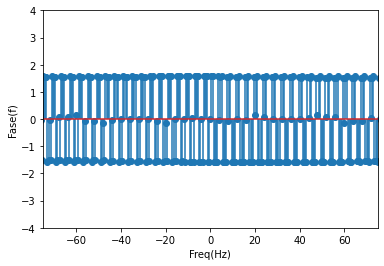

In [11]:
Ef        = np.fft.fft(e) / len(e)
fk        = np.fft.fftfreq(len(Ef), Ts)
fase      = np.angle(Ef)
amplitude = np.abs(Ef)

plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amplitude, use_line_collection = True)
plt.axis([-75, 75, -0.1, 0.5])
plt.figure()

plt.xlabel("Freq(Hz)")
plt.ylabel("Fase(f)")
plt.stem(fk,fase, use_line_collection = True)
plt.axis([-75, 75, -4, 4])

<h3>3. Represente os espectrogramas de modo a analisar simultaneamente o dominio tempo e frequência.</h3>

a)  $a(t) = 2 \times cos( 2 \pi 20t ) + 5 \times sin( 2\pi21t )$

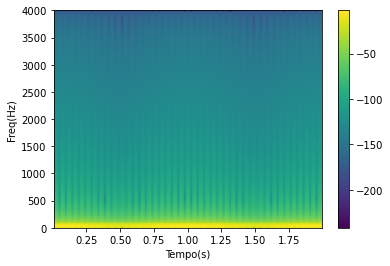

In [12]:
plt.xlabel("Tempo(s)")
plt.ylabel("Freq(Hz)")
plt.specgram(at,Fs = Fs)
plt.colorbar()

b) $ b(t) = (1 + \frac{1}{2} \times cos(2 \pi 6t)) \times cos(2 \pi 100t)$

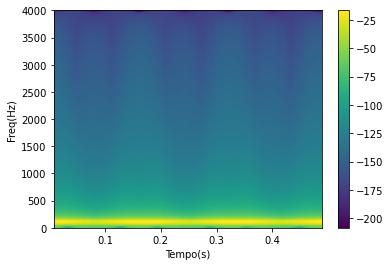

In [13]:
plt.xlabel("Tempo(s)")
plt.ylabel("Freq(Hz)")
plt.specgram(bt,Fs = Fs)
plt.colorbar()

c)  $ e^{-10t^2} \times cos(2 \pi 50t) \times (u(t + 3) - u(t - 3)) $

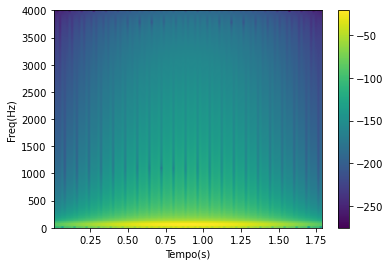

In [14]:
plt.xlabel("Tempo(s)")
plt.ylabel("Freq(Hz)")
plt.specgram(ct,Fs = Fs)
plt.colorbar()

d)  $ \frac{4}{\pi} \sum_{k=1}^{N} \frac{sin(2\pi(2k-1)f_0t)}{2k - 1} $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $ 

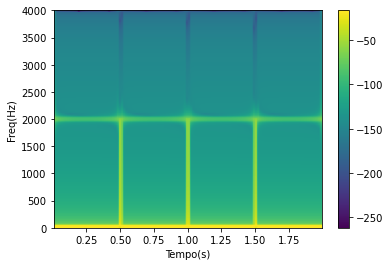

In [15]:
plt.xlabel("Tempo(s)")
plt.ylabel("Freq(Hz)")
plt.specgram(d,Fs = Fs)
plt.colorbar()

e)  $ \frac{8}{\pi^2} \sum_{k=1}^{N} (-1)^k (\frac{sin(2\pi(2k-1)f_0t)}{(2k - 1)^2}) $ , onde $ f_0t = 1Hz $ e $ N \in \{1,10,1000\} $

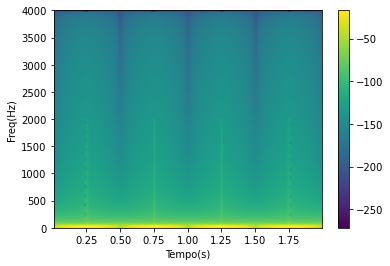

In [16]:
plt.xlabel("Tempo(s)")
plt.ylabel("Freq(Hz)")
plt.specgram(e,Fs = Fs)
plt.colorbar()

<center><h2>II. Sintese de notas musicais</h2></center>

<h3>4. Desenvolva uma função que crie composições musicais baseadas em sinusóides:</h3>

- A função tem como argumentos de entrada uma lista de tuplos representantes das notas e suas duraçõoes no formato (nota, número de unidades de tempo) e a unidade de tempo (em bpm).
- A nota deve ser expressa usando a notação ABC, exemplo: ( (’c’, 4), (’e’, 4), (’g’, 4), (’c5’, 1) ) ).
- A função deve retornar um array com as amplitudes instantaneas correspondentes à composição musical.
- Deve exemplificar o funcionamento da função com a crie uma composição onde varie a frequência e a duração das notas.
- Visualize o sinal no domínio do tempo e na frequência (espectro e espectrograma).
- Oiça o sinal criado e altere os bpms para verificar as diferenças.


In [17]:
seven_nation_army = (('e',2), ('e',1), ('g',1), ('e',1), ('d',1), ('c',2.5), ('b',1.5))
satisfaction      = (('b',1), ('b',1), ('stop',0.5), ('b',0.5), ('d',0.5), ('d',2), ('d',.5), ('d',0.5), ('d',0.5), ('d',0.5), ('b',1), ('b',1))

In [18]:
notas_freq = {'a': 49,
              'g': 47,
              'f': 45,
              'e': 44,
              'd': 42,
              'c': 40,
              'b': 39,
              'stop': 0}
    
def grab_freq(nota):
    freq = notas_freq[nota]
    return freq

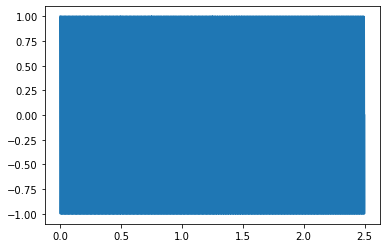

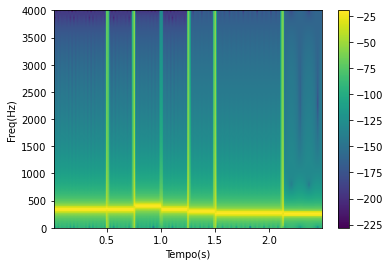

In [51]:
def composicao(notas, bpm):
    inc        = 1/8000
    tempoTotal = 0
    tempo      = 60 / bpm
    for nota in notas:
        tempoTotal += nota[ 1 ]
        
    tempoTotal = round(tempoTotal * tempo, 1)
    array      = [ ]
    
    for nota in notas:
        bps   = bpm / 60
        t     = np.arange(0, nota[1] / bps, inc)
        # fN = 2**((N-49)/12)*440
        freq  = (2 ** (( grab_freq(nota[0]) - 49) / 12)) * 440
        tNota = np.cos(2 * np.pi * freq * t)
        array = np.hstack((array, tNota))

    array = np.hstack((array, 0))
    
    plt.plot(np.arange(0, tempoTotal, tempoTotal / len( array )), array)
    display(Audio(data = array, rate = 8000))
    
    plt.figure()
    plt.xlabel("Tempo(s)")
    plt.ylabel("Freq(Hz)")
    plt.specgram(array,Fs = Fs)
    plt.colorbar()
#Com os bpm a 120    
#composicao(satisfaction, bpm = 120)
#Com os bpm a 120*2 = 240
composicao(seven_nation_army, bpm = 120*2)


<h3>5. Crie uma nova versão da função onde seja implementada o modelo ADSR de modo a que as notas criadas sejam
menos artificiais.</h3>

- Deverá ser possível parametrizar o tempo de Attack/Decay/Sustain/Release em percentagem do tempo da nota / ou em alternativa com valores constantes.
- Analise as diferenças comparando com a versão original.


In [20]:
def adsr(freq,arrayTempos):
    atack   = np.linspace(0, 1, len(arrayTempos) * 0.1)
    decay   = np.linspace(1, 0.7, len(arrayTempos) * 0.2)
    sustain = np.linspace(0.7, 0.4, len(arrayTempos) * 0.4)
    release = np.linspace(0.4, 0, len(arrayTempos) * 0.3)
    
    ADSR = [atack, decay, sustain, release]
    
    resultado = []
    sinal     = np.cos(2 * np.pi * freq * arrayTempos)
    lastIndex = 0
    for etapa in ADSR:
        resultado = np.hstack((resultado,sinal[lastIndex : lastIndex + len(etapa)] * etapa ))
        lastIndex += len(etapa)
    return resultado

In [21]:
def composicao_ADSR(notas, bpm):
    inc        = 1 / 8000
    tempoTotal = 0
    tempo      = 60 / bpm
    for nota in notas:
        tempoTotal += nota[1]
        
    tempoTotal = round(tempoTotal * tempo, 1)
    print("tempo da composicao (s) " + str(tempoTotal))
    array = []
    for nota in notas:
        bps   = bpm / 60
        t     = np.arange(0, nota[1] / bps, inc)
        freq  = (2 **(( grab_freq(nota[0])  -49) / 12)) * 440
        array = np.hstack((array, adsr(freq, t)))

    plt.plot(np.arange(0, tempoTotal, tempoTotal / len(array)), array)
    display(Audio(data = array, rate = 8000))
    plt.figure()
    plt.xlabel("Tempo(s)")
    plt.ylabel("Freq(Hz)")
    plt.specgram(array,Fs = Fs)
    plt.colorbar()

In [56]:
#composicao_ADSR(seven_nation_army,bpm = 120*2)

<center><h2>III. Processamento e visualização de informação geográfica</h2></center>

<h3>6. O processamento de informação geográfica é uma ferramenta cada vez mais útil em múltiplas aplicações.</h3>

- Pretende-se estudar uma etapa da volta a Fran¸ca em bicicleta de 2019 (a 14a etapa) - resumo do que aconteceu aqui https://www.cyclingnews.com/races/tour-de-france-2019/stage-14/results/.
- São fornecidos ficheiros json com os dados de vários participantes e pretende-se que sejam explorados usando o jupyther e o
ipyleaflet.
- Pretende-se que seja desenhada a etapa (com polígonos), calculados o no de km a subir e a descer, determinada a velocidade média (em todo o percurso e separadamente nos troços a subir e a descer), a distância em plano, etc. Devem comparar ainda a evolução do participante que ficou melhor colocado com a do que ficou pior colocado.

In [23]:
import json # biblioteca para interagir com json
import os # biblioteca para interagir com ficheiros no sistema operativo
import requests # biblioteca para realizar pedidos request web
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

In [24]:
fMH = open( "marco-haller-14th-stage-Tour-de-France.json"       , "r" )
fMB = open( "maxime-bouet-14th-stage-Tour-de-France.json"       , "r" )
fMK = open( "michal-kwiatkowski-14th-stage-Tour-de-France.json" , "r" )
fSK = open( "steven-kruijswijk-14th-stage-Tour-de-France.json"  , "r" )
fTP = open( "thibaut-pinot-14th-stage-Tour-de-France.json"      , "r" )
fTG = open( "thomas-de-gendt-14th-stage-Tour-de-France.json"    , "r" )

dataMH = json.load( fMH )
dataMB = json.load( fMB )
dataMK = json.load( fMK )
dataSK = json.load( fSK )
dataTP = json.load( fTP )
dataTG = json.load( fTG )

<h4>Etapa de cada ciclista desenhada com polígonos.</h4>

In [25]:
def etapa( data, zoom ):
    center   = data[ "latlng" ][ 0 ]
    m        = Map( center = center, zoom = zoom )
    
    dic = { }
    dic[ 'type' ] = 'FeatureCollection'
    dic[ 'features' ] = [ { 'type': 'Feature', 'properties': {}, 'geometry':{} } ]
    dic[ 'features' ][ 0 ][ 'geometry' ] = { 'type': 'LineString', 'coordinates': [ ] }
    
    posicoes  = data[ "latlng" ]
    #novas_pos = [ ]
    #for i in range( len( posicoes ) ):
    #    novas_pos.append( posicoes[ i ][ ::-1 ] )
    #print(novas_pos)
    polygon = Polygon(
        locations  = posicoes,
        color      = "green",
        fill_color = "green"
    )
    m.add_layer(polygon)
    display(m)

In [26]:
etapa(dataMH, 9)

Map(center=[43.231387, 0.08196], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [27]:
etapa(dataMB, 9)

Map(center=[43.224838, -0.001915], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [28]:
etapa(dataMK, 9)

Map(center=[43.231403, 0.082213], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [29]:
etapa(dataSK, 9)

Map(center=[43.224048, -0.002301], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [30]:
etapa(dataTP, 9)

Map(center=[43.1876, -0.043387], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [31]:
etapa(dataTG, 9)

Map(center=[43.231468, 0.08229], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

<h4>Distância em kilómetros, que cada ciclista percorreu a descer.</h4>

In [32]:
def km_a_descer( data ):
    listaGR    = data[ "grade_smooth" ]
    listaDist  = data[ "distance" ]
    neg_found  = False
    neg_index  = 0
    pos_found  = False
    total_dist = 0
    for i in range( len( listaGR ) ):
        if listaGR[ i ] < 0:
            if not neg_found:
                neg_found = True
                neg_index = i
        else:
            pos_found = True
        if neg_found:
            if pos_found:
                total_dist += ( listaDist[ i - 1 ] - listaDist[ neg_index ] )
                neg_found   = False
                pos_found   = False
                
    total_dist /= 1000
    total_dist = round( total_dist, 3 )
    return total_dist

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 35.257 KM | 32.526 KM | 32.131 KM | 26.04 KM | 30.213 KM | 30.464 KM |

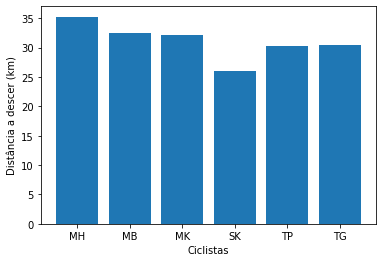

In [33]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ km_a_descer( dataMH ), km_a_descer( dataMB ), km_a_descer( dataMK ), km_a_descer( dataSK ), km_a_descer( dataTP ), km_a_descer( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Distância a descer (km)" )
plt.show()

<h4>Distância em kilómetros, que cada ciclista percorreu a subir.</h4>

In [34]:
def km_a_subir( data ):
    listaGR    = data[ "grade_smooth" ]
    listaDist  = data[ "distance" ]
    neg_found  = False
    pos_found  = False
    pos_index  = 0
    total_dist = 0
    for i in range( len( listaGR ) ):
        if listaGR[ i ] > 0:
            if not pos_found:
                pos_found = True
                pos_index = i
        else:
            neg_found = True
        if pos_found:
            if neg_found:
                total_dist += ( listaDist[ i - 1 ] - listaDist[ pos_index ] )
                neg_found = False
                pos_found = False
                
    total_dist /= 1000
    total_dist = round( total_dist, 3)
    return total_dist

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 59.589 KM | 66.62 KM | 68.823 KM | 50.029 KM | 59.252 KM | 49.284 KM |

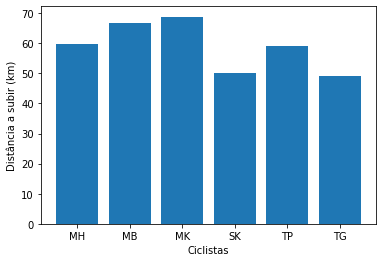

In [35]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ km_a_subir( dataMH ), km_a_subir( dataMB ), km_a_subir( dataMK ), km_a_subir( dataSK ), km_a_subir( dataTP ), km_a_subir( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Distância a subir (km)" )
plt.show()

<h4>Distância em kilómetros, que cada ciclista percorreu em plano.</h4>

In [36]:
def km_em_plano1( data ):
    listaGR        = data[ "grade_smooth" ]
    listaDist      = data[ "distance" ]
    zero_found     = False
    notZero_found  = False
    zero_index     = 0
    notZero_index  = 0
    total_dist     = 0
    for i in range( len( listaGR ) ):
        if listaGR[ i ] == 0.0:
            if not zero_found:
                zero_found = True
                zero_index = i
        else:
            if zero_found:
                notZero_found = True
                notZero_index = i
        if zero_found:
            if notZero_found :
                total_dist    += ( listaDist[ notZero_index - 1 ] - listaDist[ zero_index ] )
                zero_found    = False
                notZero_found = False
                
    total_dist /= 1000
    total_dist = round( total_dist, 3 )
    return total_dist

def km_em_plano(data):
    return round( data[ "distance" ][ -1 ] / 1000 - km_a_descer( data ) - km_a_subir( data ), 3 )

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 29.191 KM | 17.271 KM | 26.52 KM | 40.35 KM | 20.071 KM | 47.475 KM |

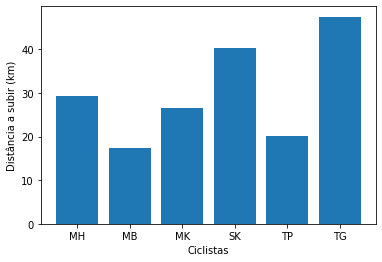

In [37]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ km_em_plano( dataMH ), km_em_plano( dataMB ), km_em_plano( dataMK ), km_em_plano( dataSK ), km_em_plano( dataTP ), km_em_plano( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Distância a subir (km)" )
plt.show()

<h4>Velocidade Média de cada ciclista a subir.</h4>

In [38]:
def vel_media_a_subir( data ):
    lista_grad = data[ "grade_smooth" ]
    vel_media  = 0
    if "velocity_smooth" in data.keys():
        lista_vel  = data[ "velocity_smooth" ]
        n          = 0
        sum_of_vel = 0
        for i in range( len( lista_grad ) ):
            if lista_grad[ i ] > 0:
                sum_of_vel += lista_vel[ i ]
                n += 1
        vel_media = round( sum_of_vel / n , 3 )
        
    else:
        lista_time   = data[ "time" ]
        distancia    = km_a_subir( data ) * 1000
        n_of_seconds = 0
        for i in range( len( lista_time ) ):
            if lista_grad[ i ] > 0:
                n_of_seconds += 1
        vel_media =  round( distancia / n_of_seconds, 3)
        
    return vel_media

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 6.81 m/s | 6.129 m/s | 6.137 m/s | 7.195 m/s | 7.785 m/s | 6.447 m/s |

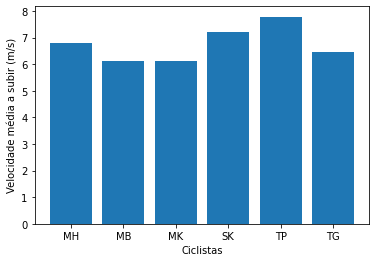

In [39]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ vel_media_a_subir( dataMH ), vel_media_a_subir( dataMB ), vel_media_a_subir( dataMK ), vel_media_a_subir( dataSK ), vel_media_a_subir( dataTP ), vel_media_a_subir( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Velocidade média a subir (m/s)" )
plt.show()

<h4>Velocidade Média de cada ciclista a descer.</h4>

In [40]:
def vel_media_a_descer( data ):
    lista_grad = data[ "grade_smooth" ]
    vel_media  = 0
    if "velocity_smooth" in data.keys():
        lista_vel  = data[ "velocity_smooth" ]
        n          = 0
        sum_of_vel = 0
        for i in range( len( lista_grad ) ):
            if lista_grad[ i ] < 0:
                sum_of_vel += lista_vel[ i ]
                n += 1
        vel_media = round( sum_of_vel / n , 3 )
        
    else:
        lista_time   = data[ "time" ]
        distancia    = km_a_descer( data ) * 1000
        n_of_seconds = 0
        for i in range( len( lista_time ) ):
            if lista_grad[ i ] < 0:
                n_of_seconds += 1
        vel_media =  round( distancia / n_of_seconds, 3)
        
    return vel_media

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 15.179 m/s | 13.672 m/s | 11.164 m/s | 16.934 m/s | 16.446 m/s | 15.358 m/s |

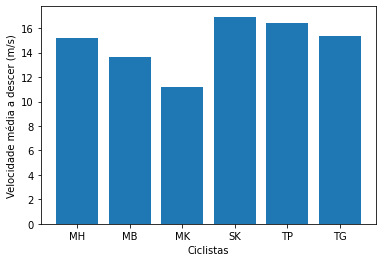

In [41]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ vel_media_a_descer( dataMH ), vel_media_a_descer( dataMB ), vel_media_a_descer( dataMK ), vel_media_a_descer( dataSK ), vel_media_a_descer( dataTP ), vel_media_a_descer( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Velocidade média a descer (m/s)" )
plt.show()

<h4>Velocidade Média de cada ciclista na totalidade do percurso.</h4>

In [42]:
def vel_media_total( data ):
    distancia = data[ "distance" ][ -1 ]
    tempo     = data[ "time" ][ -1 ]
    vel_media = round( distancia / tempo, 3 )
    return vel_media

| Marco Haller | Maxime Bouet | Michal Kwiatkowski | Stven Kruijswijk | Thibaut Pinot | Thomas de Gendt |
| --- | --- | --- | --- | --- | --- |
| 8.459 KM/H | 8.491 KM/h | 8.485 KM/H | 8.703 KM/H | 9.59 KM/H | 8.467 KM/H |

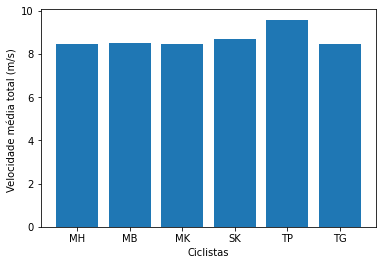

In [43]:
ciclistas = [ "MH", "MB", "MK", "SK", "TP", "TG" ]
dists     = [ vel_media_total( dataMH ), vel_media_total( dataMB ), vel_media_total( dataMK ), vel_media_total( dataSK ), vel_media_total( dataTP ), vel_media_total( dataTG ) ]
y_pos     = np.arange( len( ciclistas ) )
plt.bar( y_pos, dists )
plt.xticks( y_pos, ciclistas )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Velocidade média total (m/s) ")
plt.show()

<h4>Comparação entre o melhor e o pior colocados</h4>

In [44]:
ciclistas = [ dataMH, dataMB, dataMK, dataSK, dataTP, dataTG ]

def vencedor( lista ):
    menor_tempo = math.inf
    vencedor    = None
    for ciclista in lista:
        if ciclista[ "time" ][ -1 ] < menor_tempo:
            menor_tempo = ciclista[ "time" ][ -1 ]
            vencedor    = ciclista
    return vencedor

def ultimo( lista ):
    maior_tempo = 0
    ultimo      = None
    for ciclista in lista:
        if ciclista[ "time" ][ -1 ] > maior_tempo:
            maior_tempo = ciclista[ "time" ][ -1 ]
            ultimo      = ciclista
    return ultimo

- Evolução da velocidade ao longo do tempo

In [45]:
#plt.plot( vencedor( ciclistas )[ "time" ], vencedor(ciclistas)[ "velocity_smooth" ]  )
#plt.plot(   ultimo( ciclistas )[ "time" ],   ultimo(ciclistas)[ "velocity_smooth" ]  )

Fez-se dois plt.bar's sendo o 1º do que venceu e o 2º o que chegou em último.

<img src="evolucao_altitude.PNG"/>

Com esta imagem dá para concluir que apesar dos gráficos serem bastantes idênticos, no 1º gráfico existem maiores picos de velocidade média com maior duração. Sendo no gráfico número dois acontecer momentos onde o ciclista este parado.

- Comparação da potência média

In [46]:
def pot_media( data ):
    n            = 0
    sum_of_watts = 0
    for watt in data[ "watts_calc" ]:
        n += 1
        sum_of_watts += watt
    result = round( sum_of_watts / n, 3 )
    return result

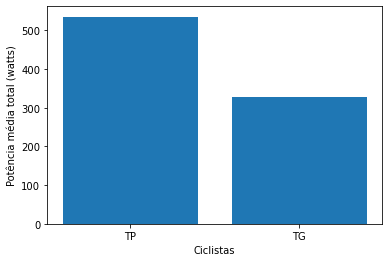

In [47]:
nomes     = [ "TP", "TG" ]
pots      = [ pot_media( vencedor( ciclistas ) ), pot_media( ultimo( ciclistas ) ) ]
bars      = np.arange( len( nomes ) )
plt.bar( bars, pots )
plt.xticks( bars, nomes )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Potência média total (watts)" )
plt.show()

- Comparação da cadência média

In [48]:
def cad_media( data ):
    n            = 0
    sum_of_rpm   = 0
    for rpm in data[ "cadence" ]:
        n += 1
        sum_of_rpm += rpm
    result = round( sum_of_rpm / n, 3 )
    return result

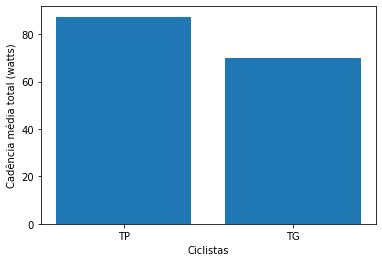

In [49]:
nomes     = [ "TP", "TG" ]
cads      = [ cad_media( vencedor( ciclistas ) ), cad_media( ultimo( ciclistas ) ) ]
bars      = np.arange( len( nomes ) )
plt.bar( bars, cads )
plt.xticks( bars, nomes )
plt.xlabel( "Ciclistas" )
plt.ylabel( "Cadência média total (watts)" )
plt.show()